# European Environmental Agency Download Pipeline

In [4]:
import pandas as pd
import numpy as np
import json
from zipfile import ZipFile
import os
import time
import matplotlib.pyplot as plt

In [5]:
import requests
apiUrl = "https://eeadmz1-downloads-api-appservice.azurewebsites.net/"

### City info

In [ ]:
cities_by_country = {
    "PT": ["Lisboa (greater city)"],
    "ES": ["A Coruña", "Barcelona", "Cartagena", "Madrid"],
    "NO": ["Stavanger"],
    "FR": ["Paris (greater city)", "Marseille"],
    "IT": ["Milano (greater city)", "Roma", "Trapani", "Cagliari"],
    "CH": ["Zürich (greater city)", "Genève (greater city)"],
    "GB": ["Greater Belfast", "City of Edinburgh", "Leeds", "Cardiff", "London (greater city)"],
    "GR": ["Athina"],
    "LU": ["Luxembourg"],
    "CZ": ["Praha"],
    "HU": ["Budapest"],
    "PL": ["Gdansk", "Warszawa"],
    "DK": ["København"],
    "EE": ["Tallinn"],
    "BA": []
}

## Get ParquetFiles

In [7]:
# Both endpoints are invoked exactly the same way
save_in = 'air_EEA'

# endpoint = "ParquetFile"
endpoint = "ParquetFile/dynamic"

for country in cities_by_country.keys():
    for city in cities_by_country[country]:  
        #Request body
        request_body = {
        "countries": [country],
        "cities": [city],
        "pollutants": ["CO", "PM2.5", "PM10"],
        "dataset": 1,
        "dateTimeStart": "2025-05-22T01:00:00.000Z",
        "dateTimeEnd": "2025-06-15T12:00:00.000Z",
        "aggregationType": "hour"
        }
        fileName = f"air_EEA/{country}_{city}_air.zip"
        # A get request to the API
        downloadFile = requests.post(apiUrl+endpoint, json=request_body).content
        # Store in local path
        output = open(fileName, 'wb')
        output.write(downloadFile)
        output.close()
        


In [8]:
# Both endpoints are invoked exactly the same way
save_in = 'air_EEA'

# endpoint = "ParquetFile"
endpoint = "ParquetFile/dynamic"

for country in cities_by_country.keys():
    for city in cities_by_country[country]:  
        # Request body
        request_body = {
        "countries": [country],
        "cities": [city],
        "pollutants": ["CO"], # ["CO", "PM2.5", "PM10"],
        "dataset": 1,
        "dateTimeStart": "2025-05-22T01:00:00.000Z",
        "dateTimeEnd": "2025-06-15T12:00:00.000Z",
        "aggregationType": "hour"
        }
        fileName = f"{save_in}/{country}_{city}_air.zip"
        # A get request to the API
        downloadFile = requests.post(apiUrl+endpoint, json=request_body).content
        # Store in local path
        output = open(fileName, 'wb')
        output.write(downloadFile)
        output.close()
    
    #loading the temp.zip and creating a zip object
        try:
            with ZipFile(fileName, 'r') as zObject:
                # Extracting all the members of the zip 
                # into a specific location.
                zObject.extractall(f'{save_in}')
            os.rename(f'{save_in}/E2a', f'{save_in}/{country}_{city}')
            print(f'success for {country}_{city}')
        except Exception as error:
            #print(error)
            print(f'fail for {country}_{city}')
        


success for PT_Lisboa (greater city)
success for ES_A Coruña
success for ES_Barcelona
success for ES_Cartagena
success for ES_Madrid
fail for NO_Stavanger
success for FR_Paris (greater city)
success for FR_Marseille
success for IT_Milano (greater city)
success for IT_Roma
success for IT_Trapani
success for IT_Cagliari
success for CH_Zürich (greater city)
success for CH_Genève (greater city)
success for GB_Greater Belfast
success for GB_City of Edinburgh
success for GB_Leeds
success for GB_Cardiff
success for GB_London (greater city)
success for GR_Athina
success for LU_Luxembourg
success for CZ_Praha
fail for HU_Budapest
success for PL_Gdansk
success for PL_Warszawa
success for DK_København
success for EE_Tallinn


## Extract data from parquet files into a DataFrame

In [ ]:
from numpy import NaN
import pandas as pd
import os

save_in='air_EEA'

final_df=pd.DataFrame()
for city_folder in [f for f in os.listdir(save_in) if f != ".DS_Store"]:
        
    country, city = city_folder.split('_')
    city_dir = f'{save_in}/{country}_{city}'
    sensor_files = os.listdir(city_dir)
    
    df_city=pd.DataFrame()
    for sensor_file in sensor_files:
        df = pd.read_parquet(f'{city_dir}/{sensor_file}')
        df[df["Value"] <= 0] = NaN
        sensorID = sensor_file
        df["sensorID"] = sensorID
        print(sensorID)
        df["day"] = df["End"].dt.date
        df["hour"] = df["End"].dt.hour
        df['country'] = country
        df['city'] = city
        df['Value'] = df['Value'].astype('float32')
        cols = ['sensorID', 'country', 'city', 'day', 'hour', 'Value', 'End']
        df = df[cols]
        df_city = pd.concat([df_city, df], ignore_index=True)
    final_df = pd.concat([final_df, df_city], ignore_index=True)

SPO-FR04055_10.parquet
SP_28092005_6_48.parquet
SP_28079035_6_48.parquet
SP_28079004_6_48.parquet
SP_28079056_6_48.parquet
SP_28079008_6_48.parquet
SPO-DK0045A_00010_100.parquet
SPO-DK0034A_00010_100.parquet
SPO-FR03043_10.parquet
SP_30016020_6_48.parquet
SP_30016021_6_48.parquet
SP_30016001_6_48.parquet
SPO-PT03100_00010_100.parquet
SPO-PT03082_00010_100.parquet
SPO-PT03083_00010_100.parquet
SPO-PT03072_00010_100.parquet
SPO-PT03097_00010_100.parquet
SPO-PT03075_00010_100.parquet
SPO-PT03071_00010_100.parquet
SPO.IT1290A_10_NDIR_1994-02-01_00_00_00.parquet
SPO.IT1016A_10_NDIR_1995-06-01_00_00_00.parquet
SPO.IT0477A_10_NDIR_1988-07-01_00_00_00.parquet
SPO.IT0480A_10_NDIR_1989-10-01_00_00_00.parquet
GB_SamplingPoint_107.parquet
SPO-EE0020A_00010_100.parquet
SPO-EE0015A_00010_100.parquet
SPO-EE0018A_00010_100.parquet
SPO.CZ_ALIBA_CO_40282.parquet
SPO.CZ_ALEGA_CO_41158.parquet
GB_SamplingPoint_127.parquet
SP_15030001_6_48.parquet
SP_15030027_6_48.parquet
SPO_PL0052A_10_001.parquet
GB_Samp

In [11]:
final_df["End"] = final_df["End"].dt.tz_localize("Etc/GMT-1").dt.tz_convert("UTC")
final_df['sensorID']=final_df['sensorID'].apply(lambda col: col.split('.')[0])

In [12]:
valid_df = pd.read_csv('coordinates_valid_sampling_pts.csv')
valid_stations = list(valid_df['Sampling station ID'])

In [13]:
final_df_filtered = final_df.loc[final_df['sensorID'].isin(valid_stations)]

In [14]:
final_df_filtered['country_city'] = final_df_filtered['country'] + '_' + final_df_filtered['city']

/var/folders/01/t0tyw8pn5b12d671zydx4_dc0000gn/T/ipykernel_80578/4033069165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_filtered['country_city'] = final_df_filtered['country'] + '_' + final_df_filtered['city']


### Reviewing dataframe

In [15]:
final_df_filtered.groupby('country_city')['sensorID'].nunique()

country_city
CH_Zürich (greater city)    2
DK_København                1
EE_Tallinn                  1
ES_A Coruña                 1
ES_Barcelona                5
ES_Cartagena                1
ES_Madrid                   2
FR_Marseille                1
FR_Paris (greater city)     1
GB_Cardiff                  1
GB_City of Edinburgh        1
GB_Greater Belfast          1
GB_Leeds                    1
GB_London (greater city)    1
GR_Athina                   2
LU_Luxembourg               1
PT_Lisboa (greater city)    3
Name: sensorID, dtype: int64

In [376]:
size_kb = final_df_filtered.memory_usage(deep=True).sum() / 1024
print(f"{size_kb:.2f} KB")

5342.23 KB


### Save it!

In [ ]:
#final_df_filtered.to_csv('valid_sensors_data.csv')

In [19]:
final_df_filtered

,sensorID,country,city,day,hour,Value,End,country_city
0,SPO-FR04055_10,FR,Paris (greater city),2025-05-22,2.0,0.1290,2025-05-22 01:00:00+00:00,FR_Paris (greater city)
1,SPO-FR04055_10,FR,Paris (greater city),2025-05-22,3.0,0.1150,2025-05-22 02:00:00+00:00,FR_Paris (greater city)
2,SPO-FR04055_10,FR,Paris (greater city),2025-05-22,4.0,0.1080,2025-05-22 03:00:00+00:00,FR_Paris (greater city)
3,SPO-FR04055_10,FR,Paris (greater city),2025-05-22,5.0,0.1090,2025-05-22 04:00:00+00:00,FR_Paris (greater city)
4,SPO-FR04055_10,FR,Paris (greater city),2025-05-22,6.0,0.1160,2025-05-22 05:00:00+00:00,FR_Paris (greater city)
...,...,...,...,...,...,...,...,...
34702,SPO-CH0005A_00010_502,CH,Zürich (greater city),2025-06-15,8.0,0.1452,2025-06-15 07:00:00+00:00,CH_Zürich (greater city)
34703,SPO-CH0005A_00010_502,CH,Zürich (greater city),2025-06-15,9.0,0.1515,2025-06-15 08:00:00+00:00,CH_Zürich (greater city)
34704,SPO-CH0005A_00010_502,CH,Zürich (greater city),2025-06-15,10.0,0.1936,2025-06-15 09:00:00+00:00,CH_Zürich (greater city)
34705,SPO-CH0005A_00010_502,CH,Zürich (greater city),2025-06-15,11.0,0.2026,2025-06-15 10:00:00+00:00,CH_Zürich (greater city)


# Overview

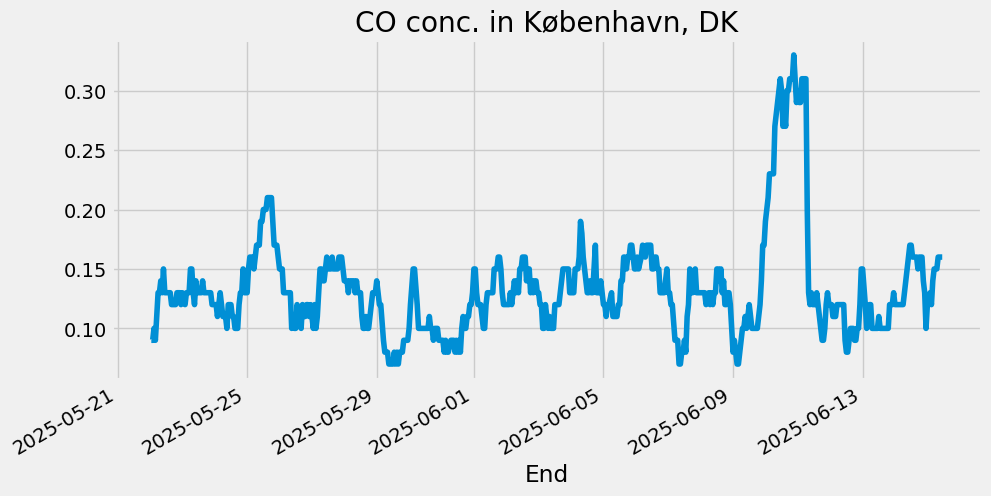

In [20]:
place='DK_København'
available_sensors = final_df_filtered.sensorID.unique()
for sensorID_file in os.listdir(f'{save_in}/{place}'):
    sensorID=sensorID_file.split('.')[0]
    if sensorID not in available_sensors:
        continue
    sensorData = final_df_filtered[final_df_filtered['sensorID']==sensorID]
    #sensorData.loc[sensorData['Value']==0]=np.nan
    country, city = sensorData[['country', 'city']].iloc[0]
    sensorData.set_index('End')['Value'].plot(figsize=(10,5))
    plt.style.use("fivethirtyeight")
    plt.title(f"CO conc. in {city}, {country}")
    plt.show()